In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# file path
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# create dataframes
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# merge dataframes
mouse_raw_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# check counts
print(mouse_raw_df["Mouse ID"].value_counts())
print(len(mouse_raw_df["Mouse ID"]))


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64
1893


In [3]:
# drop duplicates and store as clean df
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_df.drop_duplicates(subset=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"], inplace=True, ignore_index=True)
mouse_df

# check counts from clean df
print(mouse_df["Mouse ID"].value_counts())
print(len(mouse_df["Mouse ID"]))

g989    12
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64
1892


<AxesSubplot:xlabel='Drug Regimen'>

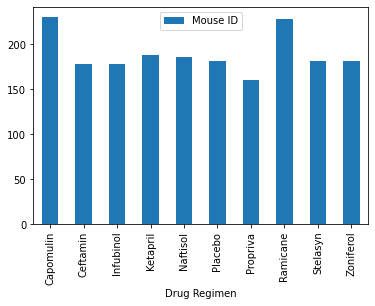

In [6]:
## use Pandas DataFrame.plot() to generate a bar plot 

drug_df = mouse_df[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")
d_group = drug_df.groupby(["Drug Regimen"])
drug_regimen_by_count = pd.DataFrame(d_group["Mouse ID"].count())
drug_regimen_by_count

drug_regimen_by_count.plot(kind="bar", stacked=True)

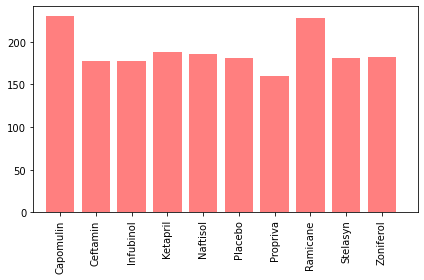

In [7]:
## use .pyplot to chart a bar chart

d_df = mouse_df[["Drug Regimen", "Mouse ID"]]
group_df = mouse_df.groupby(["Drug Regimen"])
drug_regimen_series = group_df["Mouse ID"].count()

drug_regimen_df = pd.DataFrame(drug_regimen_series).reset_index()
drug_regimen_df

x_axis = np.arange(len(drug_regimen_series))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_regimen_df["Mouse ID"], color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, drug_regimen_df["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(drug_regimen_df))
plt.tight_layout()